<a href="https://colab.research.google.com/github/AndersonPrra/JOSE_PEREIRA_DDF_TECH_122025/blob/main/codigo_do_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Técnico Dadosfera – Otimização de Ações Promocionais em um E-commerce

## Contexto do Projeto
Este projeto simula um cenário real de um grande e-commerce que busca estruturar uma Plataforma de Dados para apoiar decisões estratégicas com maior agilidade e menor custo. O foco está na análise do impacto de ações promocionais, sazonalidade, características das lojas e indicadores econômicos sobre as vendas semanais.

##A pergunta central que guia este estudo é:

**Como a empresa pode otimizar suas ações promocionais para maximizar as vendas semanais, considerando tipo de loja, departamento, sazonalidade e indicadores econômicos?**

---

## Base de Dados Utilizada
A base de dados escolhida foi obtida a partir do Kaggle e representa o histórico de vendas semanais da rede varejista Walmart (a base está disponível em https://www.kaggle.com/datasets/uelitonviana/walmart), contendo mais de **400 mil registros**. O conjunto de dados inclui informações detalhadas por loja, departamento e semana, além de variáveis relacionadas a promoções, feriados e contexto econômico regional.

Essa base é adequada ao contexto do case por apresentar:
- Escala compatível com ambientes reais de dados
- Variáveis relevantes para análise de desempenho comercial
- Dados históricos suficientes para avaliar padrões e apoiar decisões prescritivas

---

## Dicionário de Dados

| Coluna | Descrição |
|------|-----------|
| Store | Identificador da loja (45 unidades) |
| Date | Data de referência da semana |
| Weekly_Sales | Total de vendas semanais da loja |
| IsHoliday | Indica se houve feriado especial na semana |
| Temperature | Temperatura média da região da loja |
| Fuel_Price | Preço do combustível na região (USD) |
| CPI | Índice de Preços ao Consumidor da região |
| Unemployment | Taxa de desemprego da região |
| Super_Bowl | Indicador de feriado Super Bowl |
| Labor_Day | Indicador de feriado Dia do Trabalho |
| Thanksgiving | Indicador de feriado de Ação de Graças |
| Christmas | Indicador de feriado de Natal |
| week | Semana do ano |
| month | Mês de referência |
| year | Ano de referência |
| Type | Tipo da loja (A, B ou C) |
| Size | Tamanho físico da loja |
| Dept | Departamento da loja |
| MarkDown1 | Valor de desconto promocional aplicado |
| MarkDown2 | Valor de desconto promocional aplicado |
| MarkDown3 | Valor de desconto promocional aplicado |
| MarkDown4 | Valor de desconto promocional aplicado |
| MarkDown5 | Valor de desconto promocional aplicado |

---

## Observação Inicial
As colunas de MarkDown representam ações promocionais aplicadas em semanas específicas. Valores iguais a zero indicam a ausência de promoções naquela semana, refletindo o comportamento real do negócio. Ao longo do projeto, esses dados serão utilizados para avaliar a efetividade das promoções e apoiar recomendações estratégicas.

##Arquitetura Usada

Para este case foi usada uma arquitetura em camadas visando manter a integridade dos dados e melhor reaproveitamento



In [ ]:
import kagglehub
import os

# Download da última versão dos dados, salva em cache
path = kagglehub.dataset_download("uelitonviana/walmart")

print("Path to dataset files:", path)
print(os.listdir(path))

100%|██████████| 4.56M/4.56M [00:00<00:00, 99.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uelitonviana/walmart/versions/1
['clean_data (1).csv']


# Análise exploratória

In [ ]:
#os dados serão carregados em um dataframe pandas para facilitar a análise, uma vez que estamos usando o python.
import pandas as pd

dados = pd.read_csv(f"{path}/clean_data (1).csv")

A seguir é possível visualizar as colunas presentes na base de dados e abaixo temos informações dadas pela função .info() que mostra o tipo de dados e a presença de 24 colunas e 420.212 linhas.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dados.head(10)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
5,5,1,6,2010-02-05,5749.03,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
6,6,1,7,2010-02-05,21084.08,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
7,7,1,8,2010-02-05,40129.01,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
8,8,1,9,2010-02-05,16930.99,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
9,9,1,10,2010-02-05,30721.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    420212 non-null  int64  
 1   Store         420212 non-null  int64  
 2   Dept          420212 non-null  int64  
 3   Date          420212 non-null  object 
 4   Weekly_Sales  420212 non-null  float64
 5   IsHoliday     420212 non-null  bool   
 6   Temperature   420212 non-null  float64
 7   Fuel_Price    420212 non-null  float64
 8   MarkDown1     420212 non-null  float64
 9   MarkDown2     420212 non-null  float64
 10  MarkDown3     420212 non-null  float64
 11  MarkDown4     420212 non-null  float64
 12  MarkDown5     420212 non-null  float64
 13  CPI           420212 non-null  float64
 14  Unemployment  420212 non-null  float64
 15  Type          420212 non-null  object 
 16  Size          420212 non-null  int64  
 17  Super_Bowl    420212 non-null  bool   
 18  Labo

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date']) #conversão de texto para data

In [ ]:
dados.describe()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,420212.000000,420212.000000,420212.000000,420212,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,210736.390089,22.195611,44.241309,2011-06-18 07:35:12.682170112,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,25.828408,6.449866,2010.968454
min,0.000000,1.000000,1.000000,2010-02-05 00:00:00,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,105299.750000,11.000000,18.000000,2010-10-08 00:00:00,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,210775.500000,22.000000,37.000000,2011-06-17 00:00:00,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,316116.250000,33.000000,74.000000,2012-02-24 00:00:00,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,38.000000,9.000000,2012.000000
max,421569.000000,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000
std,121715.773081,12.787236,30.508819,NaN,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,14.152489,3.243397,0.796898


Abaixo são feitas obsevações considerando a governança e integridade da camada raw, portanto as visualizações:

- não alteram a base
- não criam colunas permanentes
- não fazem drop
- usam apenas views temporárias

In [ ]:
missing = (
    dados.isna()
      .sum()
      .sort_values(ascending=False)
)

missing[missing > 0]


,0


No código acima podemos observar que na base não há valores faltantes, mas caso haja, a minha etratégia para tratar a base seria:

1. Avaliar o impacto e a necessidade da presença dessa coluna considerando as regras de negócio do projeto em quetão.
2.  Avaliar a proporção de dados faltantes por coluna. Se uma coluna tiver mais de 50-60% de valores vazios, considero **excluí-la**.
3. Se o dataset for grande e a coluna não for crítica, uso **exclusão de instâncias** (linhas) apenas para colunas-alvo ou chaves.
4.  Para colunas com menos dados faltantes
    *   Se forem **numéricas**, imputo a **mediana** (se houver outliers) ou a **média**.
    *   Se forem **categóricas**, imputo a **moda** (valor mais frequente) ou crio uma categoria como "Desconhecido".
    * Se o objetivo for a contrução de uma série temporal univariada, avalio a frequência de apresentação e agregação dos dados e adiciono 0 para a contagem ausente.
5.  Se o objetivo final for usar a base para alimentar modelos de IA mais robustos, pesquiso e avalio sobre a necessidade de aplicar técnicas avançadas de imputação, como estimadores de valor faltante.
6.  Documento todas as decisões e ações adotadas.

In [ ]:
#Distribuição por ano

dados.groupby(pd.to_datetime(dados["Date"]).dt.year)["Weekly_Sales"].sum().map(lambda x: f"{x:.2f}")

,Weekly_Sales
Date,
2010,2288918883.02
2011,2448232623.87
2012,2000155641.78


In [ ]:
#cálculo de percentis

dados["Weekly_Sales"].quantile([0.01, 0.05, 0.5, 0.95, 0.99]).map(lambda x: f"{x:.2f}")

,Weekly_Sales
0.01,7.44
0.05,67.55
0.50,7661.70
0.95,61275.52
0.99,106566.35


In [ ]:
#Análise por tipo de loja

aggregated_data = dados.groupby("Type")["Weekly_Sales"].agg(
    total_sales="sum",
    avg_sales="mean",
    median_sales="median"
)

aggregated_data['total_sales'] = aggregated_data['total_sales'].map(lambda x: f"{x:.2f}")
display(aggregated_data)

,total_sales,avg_sales,median_sales
Type,,,
A,4331057478.53,20148.108162,10154.660
B,2000741648.34,12290.549297,6246.110
C,405508021.80,9549.454168,1163.425


In [ ]:
#impacto dos feriados
dados.groupby("IsHoliday")["Weekly_Sales"].mean().map(lambda x: f"{x:.2f}")

,Weekly_Sales
IsHoliday,
False,15952.82
True,17094.30


In [ ]:
holidays = ['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']

holiday_sales_data = []

for holiday in holidays:
    mean_sales = dados[dados[holiday] == True]['Weekly_Sales'].mean()
    holiday_sales_data.append({'feriado': holiday, 'média': f"{mean_sales:.2f}"})

holidays_df = pd.DataFrame(holiday_sales_data)
display(holidays_df)

,feriado,média
0,Super_Bowl,16418.78
1,Labor_Day,15934.06
2,Thanksgiving,22269.60
3,Christmas,14635.14


In [ ]:
#Percentual de semanas com promoção

markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

has_markdown = dados[markdown_cols].fillna(0).sum(axis=1) > 0

has_markdown.value_counts(normalize=True).map(lambda x: f"{x:.2%}")

,proportion
False,64.08%
True,35.92%


In [ ]:
#média de vendas com e sem promoção

dados.groupby(has_markdown)["Weekly_Sales"].mean().map(lambda x: f"{x:.2f}")

,Weekly_Sales
False,15922.14
True,16231.12


In [ ]:
#média de vendas com e sem promoção por tipo de loja

dados.groupby(["Type", has_markdown])["Weekly_Sales"].mean().unstack().map(lambda x: f"{x:.2f}")

,False,True
Type,,
A,19973.59,20461.10
B,12216.96,12421.86
C,9517.47,9605.02


In [ ]:
#Departamentos com maior impacto

dados.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False).map(lambda x: f"{x:.2f}").head(10)

,Weekly_Sales
Dept,
92,483943341.87
95,449320162.52
38,393118136.92
72,305728199.79
90,291068463.68
40,288936022.05
2,280611174.43
91,216781705.73
13,197321569.95


In [ ]:
#Indicadores econômicos × vendas

economic_vars = ["Fuel_Price", "CPI", "Unemployment", "Temperature"]

dados[economic_vars + ["Weekly_Sales"]].corr()["Weekly_Sales"].sort_values(ascending=False)

,Weekly_Sales
Weekly_Sales,1.000000
Fuel_Price,0.000089
Temperature,-0.002339
CPI,-0.021162
Unemployment,-0.025806


##Principais Resultados da Análise Exploratória

###Evolução temporal das vendas
- O volume total de vendas apresentou crescimento entre 2010 e 2011, seguido de redução em 2012:
  - 2010: aproximadamente **2,29 bilhões**
  - 2011: aproximadamente **2,45 bilhões**
  - 2012: aproximadamente **2,00 bilhões**
- Esse comportamento sugere influência de fatores externos e reforça a importância do planejamento estratégico ao longo do tempo.

###Distribuição das vendas semanais
- A distribuição de vendas semanais é assimétrica, com presença de valores extremos.
- Percentis relevantes:
  - Mediana: **7.661,70**
  - 95º percentil: **61.275,52**
  - 99º percentil: **106.566,35**
- Esses resultados indicam que poucas observações concentram volumes muito elevados de vendas, justificando análises segmentadas por loja e departamento.

###Desempenho por tipo de loja
- Lojas do tipo **A** concentram o maior volume total de vendas e apresentam maior valor médio e mediano semanal.
- Lojas do tipo **B** possuem desempenho intermediário.
- Lojas do tipo **C** apresentam menor volume e maior dispersão, sugerindo menor escala operacional.
- reforçando a necessidade de estratégias promocionais diferenciadas por tipo de loja.

###Impacto dos feriados
- Semanas com feriados apresentam, em média, vendas superiores às semanas sem feriados.
- Entre os feriados analisados, **Thanksgiving** se destaca com o maior impacto positivo nas vendas, enquanto **Christmas** e **Labor Day** apresentam impacto mais moderado.
- Esses resultados indicam oportunidades claras para planejamento de campanhas e alocação de recursos em períodos específicos.

###Promoções e desempenho de vendas
- Aproximadamente **36%** das semanas possuem alguma ação promocional ativa.
- Semanas com promoções apresentam média de vendas superior às semanas sem promoções.
- Esse efeito é observado em todos os tipos de loja, sendo mais pronunciado nas lojas do tipo **A**.
-Embora o impacto médio seja positivo, a diferença observada sugere a necessidade de avaliar a **eficiência** das promoções, e não apenas sua presença.

###Departamentos com maior impacto
- Alguns departamentos concentram grande parte do volume de vendas, indicando áreas prioritárias para análises mais detalhadas e estratégias promocionais direcionadas.
- A identificação desses departamentos é essencial para maximizar o retorno das ações comerciais.

###Indicadores econômicos
- Os indicadores econômicos analisados (preço do combustível, temperatura, CPI e desemprego) apresentaram correlação baixa com as vendas semanais.
- Isso sugere que, nesse contexto, fatores internos como promoções, tipo de loja e sazonalidade têm maior influência direta sobre o desempenho de vendas.

---

###Síntese dos Aprendizados
Os resultados da análise exploratória indicam que promoções e sazonalidade exercem impacto relevante nas vendas, porém de forma heterogênea entre tipos de loja e departamentos. Esses achados reforçam a necessidade de avançar para análises prescritivas, com foco em identificar quais ações promocionais geram maior retorno e onde devem ser priorizadas.


# Criação das camada processed, métricas para análise precritiva e camada de análise

A camada **processed** tem como finalidade organizar, padronizar e enriquecer os dados originalmente armazenados na camada raw, sem comprometer sua integridade. Nessa etapa, são realizadas transformações necessárias para viabilizar análises prescritivas, como:
- Conversão e padronização de datas
- Criação de variáveis temporais (ano, mês, semana)
- Tratamento dos dados de promoções
- Criação de indicadores auxiliares, como flags de ações promocionais e valor total de desconto

Essa camada representa um estágio intermediário da Plataforma de Dados, permitindo reutilização consistente das informações e evitando transformações repetidas em análises posteriores.


In [ ]:
import numpy as np

os.makedirs("data_lake/processed/walmart", exist_ok=True)

processed = dados.copy()

processed.drop('Unnamed: 0', axis=1, inplace=True)

# Variáveis temporais
processed["year"] = processed["Date"].dt.year
processed["month"] = processed["Date"].dt.month
processed["week"] = processed["Date"].dt.isocalendar().week.astype(int)

# Colunas de markdown
markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

# Flag de promoção
processed["has_markdown"] = processed[markdown_cols].sum(axis=1) > 0

# Valor total de desconto
processed["total_markdown"] = processed[markdown_cols].sum(axis=1)

processed.to_parquet(
    "data_lake/processed/walmart/sales_processed.parquet",
    index=False
)
#2 casas decimais
for col in processed.select_dtypes(include=['float64']).columns:
    processed[col] = processed[col].round(2)

In [ ]:
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           420212 non-null  int64         
 1   Dept            420212 non-null  int64         
 2   Date            420212 non-null  datetime64[ns]
 3   Weekly_Sales    420212 non-null  float64       
 4   IsHoliday       420212 non-null  bool          
 5   Temperature     420212 non-null  float64       
 6   Fuel_Price      420212 non-null  float64       
 7   MarkDown1       420212 non-null  float64       
 8   MarkDown2       420212 non-null  float64       
 9   MarkDown3       420212 non-null  float64       
 10  MarkDown4       420212 non-null  float64       
 11  MarkDown5       420212 non-null  float64       
 12  CPI             420212 non-null  float64       
 13  Unemployment    420212 non-null  float64       
 14  Type            420212 non-null  obj

Com os dados já processados, são definidas **métricas prescritivas** que visam apoiar a tomada de decisão estratégica. Diferentemente das análises descritivas, essas métricas não apenas explicam o que aconteceu, mas orientam ações concretas para otimização do desempenho comercial.

As métricas definidas incluem:
- **Lift de vendas**, que mensura o ganho médio de vendas associado à presença de ações promocionais `Lift = Média(Weekly_Sales | Promoção) − Média(Weekly_Sales | Sem Promoção)`

- **Eficiência promocional**, que avalia o retorno gerado por unidade de desconto aplicado `Eficiência = Lift / Média(total_markdown)`
- **Score de priorização**, que combina desempenho de vendas e eficiência das promoções para orientar investimentos e estratégias comerciais `Score = 0.4 × Vendas + 0.3 × Lift + 0.3 × Eficiência`



- Data App feito com streamlit: https://data-app-otimiza-o-de-acoes-promocionais-4aarhpvnq6xmrhpxhs2fy.streamlit.app/
- Dashboard feito com o Looker Studio: https://lookerstudio.google.com/reporting/ef025d31-4140-4bf9-a77a-6b541b04afb7



In [ ]:
#Eficiência promocional por tipo de loja

os.makedirs("data_lake/analytics/walmart", exist_ok=True)

promo_by_type = (
    processed
    .groupby(["Type", "has_markdown"])
    .agg(
        avg_sales=("Weekly_Sales", "mean"),
        avg_markdown=("total_markdown", "mean")
    )
    .reset_index()
)

promo_pivot = promo_by_type.pivot(index="Type", columns="has_markdown")

promo_pivot["lift"] = (
    promo_pivot["avg_sales", True] -
    promo_pivot["avg_sales", False]
)

promo_pivot["promo_efficiency"] = (
    promo_pivot["lift"] /
    promo_pivot["avg_markdown", True]
)

promo_pivot = promo_pivot.reset_index()

for col in promo_pivot.select_dtypes(include=['float64']).columns:
    promo_pivot[col] = promo_pivot[col].round(2)

promo_pivot.to_parquet(
    "data_lake/analytics/walmart/promo_efficiency_by_type.parquet",
    index=False
)

In [ ]:
promo_pivot.head()

Type avg_sales           avg_markdown              lift  \
has_markdown          False      True        False      True           
0               A  19973.59  20461.10          0.0  22931.95  487.51   
1               B  12216.96  12421.86          0.0  17346.32  204.90   
2               C   9517.47   9605.02          0.0   1940.14   87.55   

             promo_efficiency  
has_markdown                   
0                        0.02  
1                        0.01  
2                        0.05

In [ ]:
#Eficiência promocional por departamento

promo_by_dept = (
    processed
    .groupby(["Dept", "has_markdown"])
    .agg(
        avg_sales=("Weekly_Sales", "mean"),
        avg_markdown=("total_markdown", "mean")
    )
    .reset_index()
)

dept_pivot = promo_by_dept.pivot(index="Dept", columns="has_markdown")

dept_pivot["lift"] = (
    dept_pivot["avg_sales", True] -
    dept_pivot["avg_sales", False]
)

dept_pivot["promo_efficiency"] = (
    dept_pivot["lift"] /
    dept_pivot["avg_markdown", True]
)

dept_pivot = dept_pivot.reset_index()

for col in dept_pivot.select_dtypes(include=['float64']).columns:
    dept_pivot[col] = dept_pivot[col].round(2)

dept_pivot.to_parquet(
    "data_lake/analytics/walmart/promo_efficiency_by_dept.parquet",
    index=False
)


In [ ]:
dept_pivot.head()

Dept avg_sales           avg_markdown               lift  \
has_markdown          False      True        False      True            
0               1  19062.13  19486.52          0.0  17574.29   424.39   
1               2  43220.61  44304.08          0.0  17574.29  1083.47   
2               3  11701.38  11960.24          0.0  17574.29   258.86   
3               4  25686.20  26494.94          0.0  17574.29   808.74   
4               5  21633.62  20901.77          0.0  17574.29  -731.85   

             promo_efficiency  
has_markdown                   
0                        0.02  
1                        0.06  
2                        0.01  
3                        0.05  
4                       -0.04

In [ ]:
#Ranking final de priorização (loja × departamento)

ranking = (
    processed
    .groupby(["Store", "Dept"])
    .agg(
        avg_sales=("Weekly_Sales", "mean"),
        total_sales=("Weekly_Sales", "sum"),
        avg_markdown=("total_markdown", "mean")
    )
    .reset_index()
)

# Normalização simples
ranking["sales_norm"] = ranking["avg_sales"] / ranking["avg_sales"].max()
ranking["markdown_norm"] = ranking["avg_markdown"] / ranking["avg_markdown"].max()

# Score final
ranking["priority_score"] = (
    0.6 * ranking["sales_norm"] +
    0.4 * (1 - ranking["markdown_norm"])
)

ranking = ranking.sort_values("priority_score", ascending=False)

for col in ranking.select_dtypes(include=['float64']).columns:
    ranking[col] = ranking[col].round(2)

ranking.to_parquet(
    "data_lake/analytics/walmart/store_dept_priority.parquet",
    index=False
)


In [ ]:
ranking.head()

,Store,Dept,avg_sales,total_sales,avg_markdown,sales_norm,markdown_norm,priority_score
1057,14,92,182527.96,26101497.71,9994.64,1.00,0.07,0.97
147,2,92,164840.23,23572153.03,9977.90,0.90,0.07,0.91
1522,20,92,164633.74,23542625.04,10878.66,0.90,0.08,0.91
980,13,92,162034.10,23170876.20,11184.64,0.89,0.08,0.90
297,4,92,159365.11,22789210.43,9626.48,0.87,0.07,0.90


Antes da combinação das métricas de vendas médias (avg_sales) e intensidade média de promoção (avg_markdown) em um score único de priorização, foi realizada uma análise estatística das distribuições dessas variáveis. A análise descritiva indicou escalas bastante distintas e forte assimetria, com presença de valores extremos, especialmente em avg_sales, que apresenta cauda longa à direita, e em avg_markdown, que concentra muitos valores próximos de zero (gráficos seguem nas células abaixo).

Para validar essas observações, foi aplicado o teste de normalidade de Shapiro-Wilk em uma amostra representativa dos dados. Os resultados rejeitaram a hipótese nula de normalidade para ambas as variáveis (p-value ≪ 0,05), indicando que métodos de padronização baseados em pressupostos de normalidade, como o z-score, não seriam adequados neste contexto.

Diante disso, optou-se pela normalização Min-Max, que preserva a ordem relativa dos valores e é mais apropriada para cenários de ranking e comparação multicritério. Essa abordagem permite combinar variáveis em escalas distintas de forma interpretável e consistente, garantindo que nenhuma métrica domine o score final apenas por diferenças de magnitude, e alinhando o processo de priorização ao objetivo de suporte à decisão de negócio.

**As duas próximas células abaixo apresentam os resultados que auxiliaram nessa conclusão.**

In [ ]:
ranking[["avg_sales", "avg_markdown"]].describe()

,avg_sales,avg_markdown
count,3323.000000,3323.000000
mean,14217.616837,6921.555453
std,20933.912560,6105.527072
min,0.020000,0.000000
25%,1024.460000,3428.240000
50%,6307.080000,7303.750000
75%,18415.310000,9164.920000
max,182527.960000,143223.310000


In [ ]:
from scipy.stats import shapiro

sample_sales = ranking["avg_sales"].sample(500, random_state=42)
sample_markdown = ranking["avg_markdown"].sample(500, random_state=42)

shapiro_sales = shapiro(sample_sales)
shapiro_markdown = shapiro(sample_markdown)

shapiro_sales, shapiro_markdown

(ShapiroResult(statistic=np.float64(0.724948038522599), pvalue=np.float64(6.918855450006028e-28)),
 ShapiroResult(statistic=np.float64(0.5270090992956703), pvalue=np.float64(1.8338684652164546e-34)))

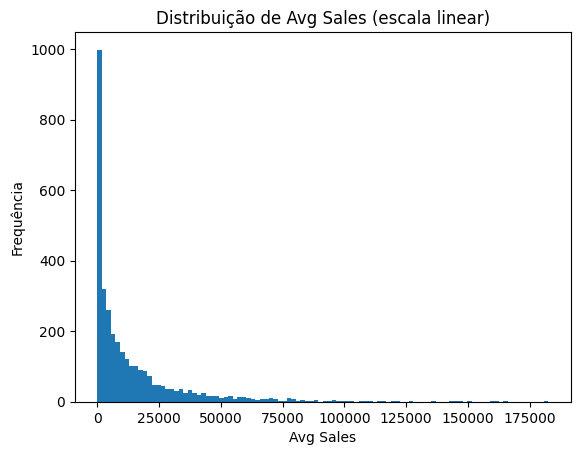

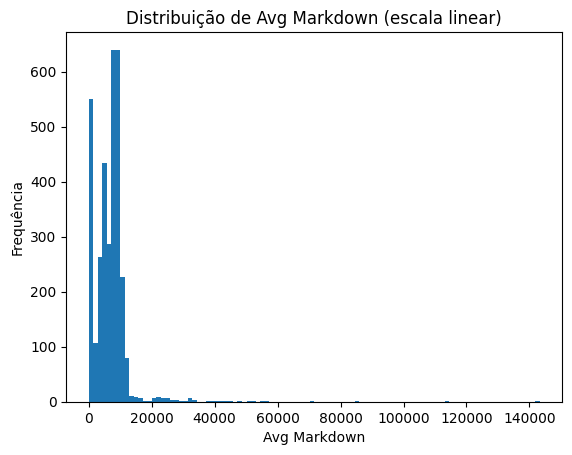

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(ranking["avg_sales"], bins=100)
plt.title("Distribuição de Avg Sales (escala linear)")
plt.xlabel("Avg Sales")
plt.ylabel("Frequência")
plt.show()

plt.figure()
plt.hist(ranking["avg_markdown"], bins=100)
plt.title("Distribuição de Avg Markdown (escala linear)")
plt.xlabel("Avg Markdown")
plt.ylabel("Frequência")
plt.show()

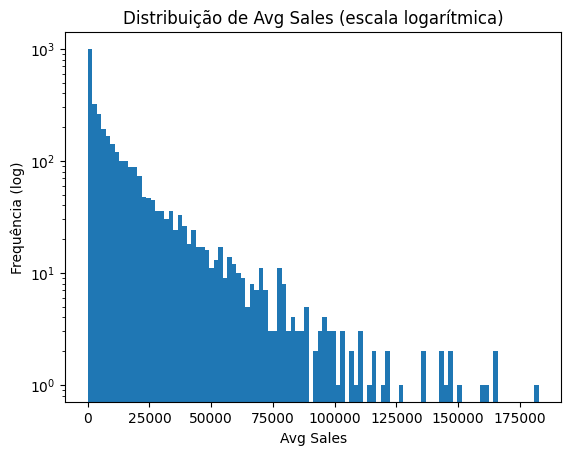

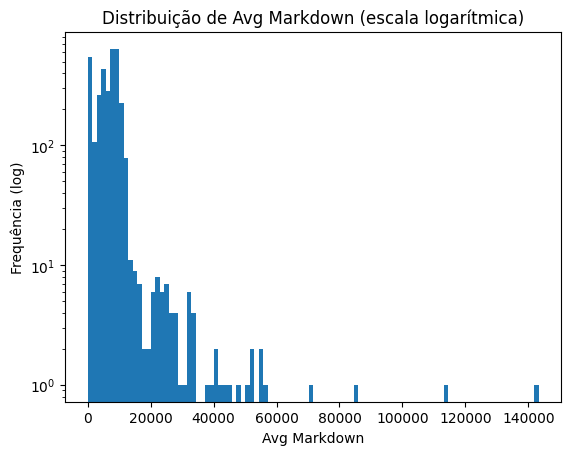

In [ ]:
plt.figure()
plt.hist(ranking["avg_sales"], bins=100)
plt.yscale("log")
plt.title("Distribuição de Avg Sales (escala logarítmica)")
plt.xlabel("Avg Sales")
plt.ylabel("Frequência (log)")
plt.show()

plt.figure()
plt.hist(ranking["avg_markdown"], bins=100)
plt.yscale("log")
plt.title("Distribuição de Avg Markdown (escala logarítmica)")
plt.xlabel("Avg Markdown")
plt.ylabel("Frequência (log)")
plt.show()

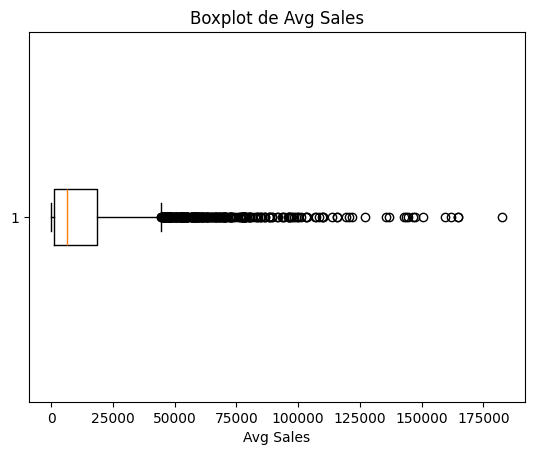

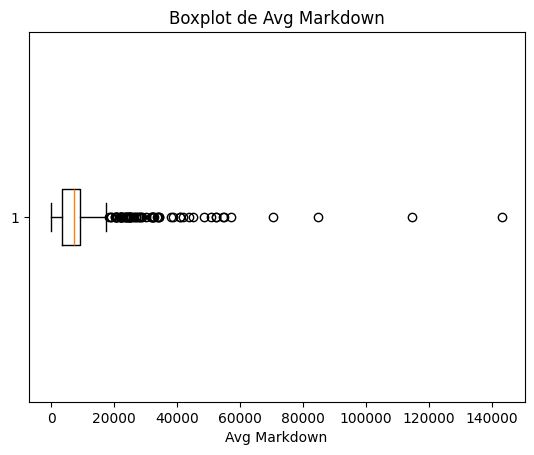

In [ ]:
plt.figure()
plt.boxplot(ranking["avg_sales"], vert=False)
plt.title("Boxplot de Avg Sales")
plt.xlabel("Avg Sales")
plt.show()

plt.figure()
plt.boxplot(ranking["avg_markdown"], vert=False)
plt.title("Boxplot de Avg Markdown")
plt.xlabel("Avg Markdown")
plt.show()
